In [2]:
import nest
import matplotlib.pyplot as plt
nest.ResetKernel()


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0
 Built: Jul 24 2025 05:27:26

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



# Postsynaptic Neuron Model

In [3]:
# ----- PARAMETERS ---
post_params = {
    "C_m": 200.0,        # pF (equivale a tau=20 ms con gL=10 nS)
    "g_L": 10.0,         # nS
    "E_L": -60.0,        # mV
    "V_th": -50.0,       # mV
    "V_reset": -60.0,    # mV
    "t_ref": 5.0,        # ms
    "E_ex": 0.0,         # mV
    "E_in": -80.0        # mV
}

#-------------Synapse time constants--------------------------

tau_ex = 5.0    # ms
tau_in = 10.0   # ms



# Create postsynaptic neuron
post_neuron =  nest.Create("iaf_cond_alpha",params={**post_params, "tau_syn_ex": tau_ex, "tau_syn_in": tau_in})

# Spike recorder 
sd_post = nest.Create("spike_recorder")
nest.Connect(post_neuron, sd_post)

# Voltmeter (option1) Registro del potencial de membrana
#voltmeter = nest.Create("voltmeter", params={"interval": 1.0})
#nest.Connect(voltmeter, post_neuron)

# Multimeter (Option2) Registro del potencial de membrana
mm_post = nest.Create("multimeter", params={"record_from": ["V_m"], "interval": 1.0})
nest.Connect(mm_post, post_neuron)

# Estimulo a la neurona 
#dc = nest.Create("dc_generator", params={"amplitude": 400.0}) #(Corriente directa)
#nest.Connect(dc, post_neuron)
sine = nest.Create('ac_generator', params={'amplitude': 200.0, 'frequency': 2.0}) # corriente alterna sin
nest.Connect(sine, post_neuron) #(Conectar la corriente a la post neuron)
noise = nest.Create('poisson_generator', 2, [
    {'rate': 7000.0},    # 700 Hz 
    {'rate': 2000.0}     # 200 Hz 
])
nest.Connect(noise[0], post_neuron, syn_spec={'weight': 0.5, 'delay': 1.0})
nest.Connect(noise[1], post_neuron, syn_spec={'weight': -0.3, 'delay': 1.5})

# Simulate
nest.Simulate(10000.0)



Jan 20 12:24:03 NodeManager::prepare_nodes [Info]: 
    Preparing 6 nodes for simulation.

Jan 20 12:24:03 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 6
    Simulation time (ms): 10000
    Number of OpenMP threads: 1
    Not using MPI

Jan 20 12:24:03 SimulationManager::run [Info]: 
    Simulation finished.


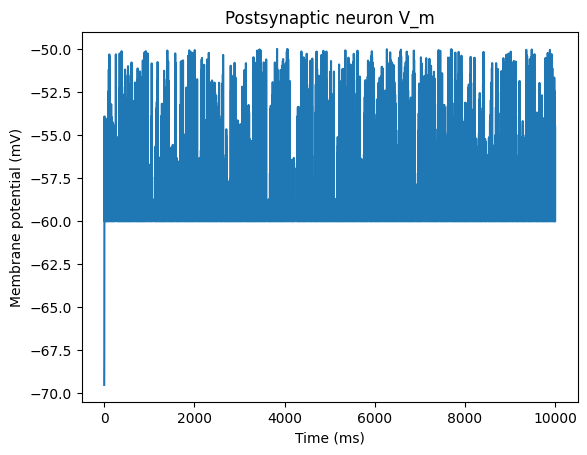

In [4]:
#option 1
#nest.voltage_trace.from_device(voltmeter);
#option 2

events = nest.GetStatus(mm_post, "events")[0]
t = events["times"]
V = events["V_m"]
plt.figure()
plt.plot(t, V)
plt.xlabel("Time (ms)")
plt.ylabel("Membrane potential (mV)")
plt.title("Postsynaptic neuron V_m")
plt.show()